In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [3]:
restaurant_review_data = pd.read_csv('/home/neosoft/Documents/CSVFiles/restaurant_reviews.txt', delimiter=";", names=['Review', 'Label'])
restaurant_review_data.head()

,Review,Label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
restaurant_review_data.shape

(16000, 2)

In [5]:
#view a sample of the contents of the dataset using the sample() 
restaurant_review_data.sample(5)

,Review,Label
6745,i know that when i take care of my body by eat...,joy
9077,i am feeling irritable cranky often,anger
8595,i will feel better for a while that i will fin...,joy
14258,i sat in the dark of my room for a few minutes...,anger
9569,i now feel more intelligent about my followers...,joy


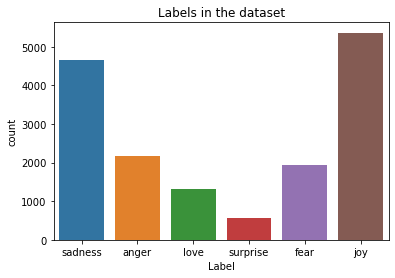

In [6]:
#Check for the various target labels in the dataset
sns.countplot(x = restaurant_review_data['Label'])
plt.title('Labels in the dataset')
plt.show()

In [7]:
# Now merging these 6 labels into two classes i.e., Positive and Negative sentiment
# joy, love and surprise are categorises as Positive Sentiment
# anger, sadness and fear are categorises as Negative Sentiment

restaurant_review_data['Label'].replace({"surprise":1, "love":1, "joy":1, "fear":0, "anger":0, "sadness":0}, inplace=True)
restaurant_review_data.head()

,Review,Label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0


In [8]:
restaurant_review_data['Label'].value_counts()

0    8762
1    7238
Name: Label, dtype: int64

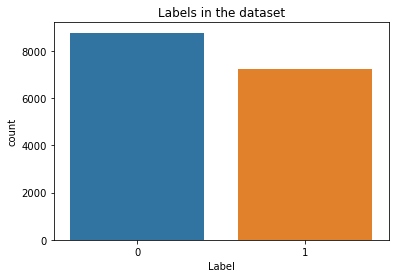

In [9]:
#Check for the various target labels in the dataset
sns.countplot(x = restaurant_review_data['Label'])
plt.title('Labels in the dataset')
plt.show()

# Data Preprocessing

Now, performing some pre-processing on the data before converting it into vectors and passing it to the machine learning model.

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [11]:
#Creating object of WordNetLemmatizer
lm = WordNetLemmatizer()

In [12]:
result = []
for review in restaurant_review_data['Review']:
    
    #Using a regular expression, we will get rid of any characters apart from alphabets.
    new_review = re.sub('[^a-zA-Z]', ' ', review)
    
    #Converting the strings to lowercase to avoid creating different vectors for the same word.
    new_review = new_review.lower()
    
    new_review = new_review.split()
    
    #Removing stopwords in the data which do not add much value.
    #Then, we will perform lemmatization on each word for getting lemma i.e., the root word.
    new_review = [lm.lemmatize(word) for word in new_review if word not in set(stopwords.words('english'))]
    
    result.append(' '.join(word for word in new_review))

In [13]:
len(result)

16000

# Word Cloud

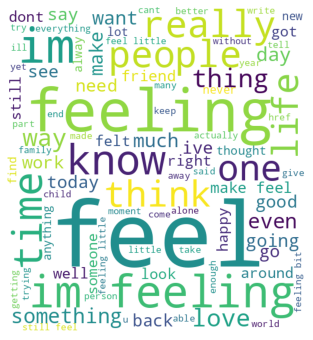

In [14]:
#Create a Word Cloud which is a data visualization technique 
#which helps to find the most frequent words in the dataset. 
#Word Cloud make more frequent words appear enlarged as compared to less frequent words

from wordcloud import WordCloud

text = ' '.join(result)
#print(text)

# Create WordCloud 
word_cloud = WordCloud(width = 550, height = 600, 
                       background_color ='white', 
                       min_font_size = 12).generate(text)

# Set wordcloud figure size
plt.figure(figsize = (8, 6)) 

# Show image
plt.imshow(word_cloud) 

# Remove Axis
plt.axis("off")  

# show plot
plt.show()

# Bag of Words (BOW)

In [15]:
# Creating the Bag of Words (BOW: vectors word frequency(count)) model
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
cv = CountVectorizer(ngram_range=(1,2))

# X contains result (dependent variable)
x = cv.fit_transform(result)
 
# y contains answers if review is positive or negative
y = restaurant_review_data.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split

# experiment with "test_size" to get better results
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 1)

# 6400 in test data and 9,600 in train data

In [18]:
x_train

<9600x106705 sparse matrix of type '<class 'numpy.int64'>'
	with 165046 stored elements in Compressed Sparse Row format>

In [19]:
y_test

array([1, 1, 0, ..., 0, 1, 0])

In [20]:
len(y_test)

6400

# Building Model

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
# n_estimators can be said as number of decision trees, experiment with n_estimators to get better results
rf_model = RandomForestClassifier(n_estimators = 501, criterion = 'entropy')
                             
rf_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=501)

In [23]:
#Predicting Final Results using .predict() method with attribute x_test 
y_pred = rf_model.predict(x_test)
y_pred

array([1, 1, 0, ..., 0, 1, 0])

# Model Evaluation

In [24]:
from sklearn.metrics import accuracy_score,precision_score, confusion_matrix

In [25]:
# Confusion matrix is used to determine the accuracy.

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[3356,   84],
       [ 204, 2756]])

In dependent variable two classes are there where positive reviews and negative reviews.

3359 is the number of correct values of positive reviews. 81 is the number of incorrect values of negative reviews.

212 is the number of incorrect values of positive reviews. 2748 is the number of correct values of negative reviews.

In [26]:
# Accuracy Score
acc_score = accuracy_score(y_test, y_pred)
print('Accuracy_score: ', acc_score)

Accuracy_score:  0.955


In [27]:
# Precision Score
pre_score = precision_score(y_test, y_pred)
print('Precision_score: ', pre_score)

Precision_score:  0.9704225352112676
